In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
import time 

In [3]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
X = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]
y = df['Apparent Temperature (C)']
X

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
0,9.472222,0.89,14.1197,1015.13
1,9.355556,0.86,14.2646,1015.63
2,9.377778,0.89,3.9284,1015.94
3,8.288889,0.83,14.1036,1016.41
4,8.755556,0.83,11.0446,1016.51
...,...,...,...,...
96448,26.016667,0.43,10.9963,1014.36
96449,24.583333,0.48,10.0947,1015.16
96450,22.038889,0.56,8.9838,1015.66
96451,21.522222,0.60,10.5294,1015.95


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

In [149]:
model.fit(X_train, y_train, epochs=5, batch_size=32) # epochs: số vòng lặp

Epoch 1/5
2412/2412 [==============================] - 4s 2ms/step - loss: 0.5083
Epoch 2/5
2412/2412 [==============================] - 4s 2ms/step - loss: 0.4540
Epoch 3/5
2412/2412 [==============================] - 4s 2ms/step - loss: 0.4468
Epoch 4/5
2412/2412 [==============================] - 4s 2ms/step - loss: 0.4126
Epoch 5/5
2412/2412 [==============================] - 4s 2ms/step - loss: 0.4247


603/603 [==============================] - 1s 1ms/step - loss: 0.4381
Mean Squared Error: 0.4380607604980469


In [153]:
start_time = time.time()
y_pred1 = model.predict(X_test)
end_time = time.time()
execution_time = end_time - start_time

603/603 [==============================] - 1s 1ms/step


In [154]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred1)
print("mean_squared_error", mse)
r2 = r2_score(y_test, y_pred1)
print("R-squared (hệ số xác định):", r2)
print("Thời gian chạy của mô hình", execution_time)

mean_squared_error 0.5191761387865741
R-squared (hệ số xác định): 0.9955126914568859
Thời gian chạy của mô hình 1.1347129344940186


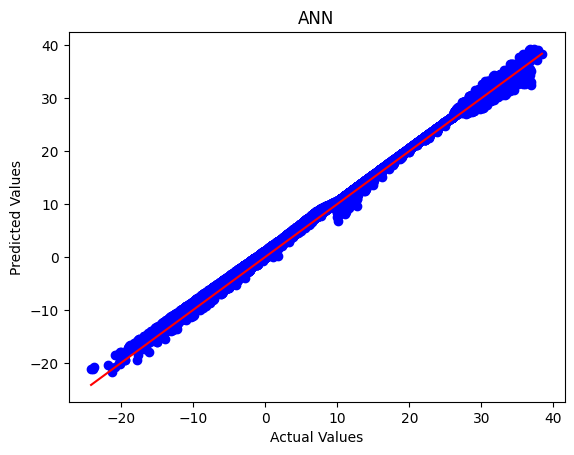

In [152]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred1, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("ANN")
plt.show()